In [1]:
from statistics import mean
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython import display
%matplotlib inline

In [2]:
chart = pd.read_csv('./gemini_ETHUSD_2020_1min.csv', skiprows=[0])  # Read file with chart
chart = chart.sort_values(by=['Date']) # Since it is in a reverse order, sort the chart ascendingly
chart = chart.reset_index(drop=True)   # Reset old index
chart.head(10)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1577836800000,2020-01-01 00:00:00,ETHUSD,128.84,128.84,128.74,128.74,0.010000
1,1577836860000,2020-01-01 00:01:00,ETHUSD,128.74,128.74,128.74,128.74,0.000000
2,1577836920000,2020-01-01 00:02:00,ETHUSD,128.74,128.74,128.74,128.74,0.000000
3,1577836980000,2020-01-01 00:03:00,ETHUSD,128.74,128.74,128.74,128.74,0.000000
4,1577837040000,2020-01-01 00:04:00,ETHUSD,128.74,128.74,128.49,128.50,4.039458
5,1577837100000,2020-01-01 00:05:00,ETHUSD,128.50,128.50,128.50,128.50,0.000000
6,1577837160000,2020-01-01 00:06:00,ETHUSD,128.50,128.50,128.50,128.50,0.000000
7,1577837220000,2020-01-01 00:07:00,ETHUSD,128.50,128.50,128.41,128.41,1.627411
8,1577837280000,2020-01-01 00:08:00,ETHUSD,128.41,128.41,128.41,128.41,0.000000
9,1577837340000,2020-01-01 00:09:00,ETHUSD,128.41,128.41,128.41,128.41,0.000000


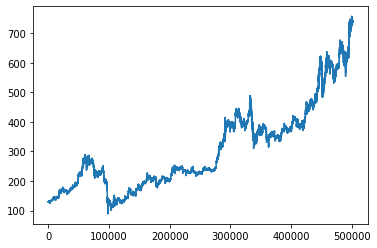

In [3]:
plt.plot(chart['Open'])

In [4]:
def calcFeatureMatrix(chart):
    
    date = []
    price = []
    last_1 = []
    last_2 = []
    last_4 = []
    last_8 = []
    i = 0

#    for item in chart.itertuples():
#        date.append(item.Date)
#        price.append(item.Open)

    print("Rows:", chart.shape[0])
    
    i = 0
    while i < chart.shape[0]:
        if(i % 10000 == 0): print(i)
        date.append(chart.iloc[i, 1])
        current_price = chart.iloc[i, 3]
        price.append(current_price)
        
        value = np.nan
        if i > 0:
            value = current_price / chart.iloc[i - 1, 3]
        last_1.append(value)

        value = np.nan
        if i > 1:
            value = current_price / chart.iloc[i - 2, 3]
        last_2.append(value)

        value = np.nan
        if i > 3:
            value = current_price / chart.iloc[i - 4, 3]
        last_4.append(value)

        value = np.nan
        if i > 7:
            value = current_price / chart.iloc[i - 8, 3]
        last_8.append(value)
        
        i+=1
        
    feature_matrix = pd.DataFrame(list(zip(date, last_8, last_4, last_2, last_1, price)), columns =['Date', 'Last 8', 'Last 4', 'Last 2', 'Last 1', 'Price'])            

    return feature_matrix

In [5]:
feature_matrix = calcFeatureMatrix(chart)
feature_matrix.head(10)

Rows: 501133
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000


,Date,Last 8,Last 4,Last 2,Last 1,Price
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,128.84
1,2020-01-01 00:01:00,NaN,NaN,NaN,0.999224,128.74
2,2020-01-01 00:02:00,NaN,NaN,0.999224,1.000000,128.74
3,2020-01-01 00:03:00,NaN,NaN,1.000000,1.000000,128.74
4,2020-01-01 00:04:00,NaN,0.999224,1.000000,1.000000,128.74
5,2020-01-01 00:05:00,NaN,0.998136,0.998136,0.998136,128.50
6,2020-01-01 00:06:00,NaN,0.998136,0.998136,1.000000,128.50
7,2020-01-01 00:07:00,NaN,0.998136,1.000000,1.000000,128.50
8,2020-01-01 00:08:00,0.996663,0.997437,0.999300,0.999300,128.41
9,2020-01-01 00:09:00,0.997437,0.999300,0.999300,1.000000,128.41
